# Stoneburner, Kurt #
- ## DSC 550 - Week 06
- ## Milestone #1

In [1]:
#//*** Consider using Waterfall Charts to plot Expected vs actual values.
#//*** This may require bar charts and binning.

In [2]:
import os
import sys
# //*** Imports and Load Data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#//*** Use the whole window in the IPYNB editor
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#//*** Maximize columns and rows displayed by pandas
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

#pd.set_option('display.width', 200)

In [3]:
# //*** Legends automatically generate too many labels based on my looping method.
# //*** Remove the Duplicate Legends. I wrote this for DSC 530 and it keeps on giving.
def deduplicate_legend(input_ax):
    # //**** Get handle and label list for the current legend
    # //**** Use first instance, toss the rest.
    handles, labels = input_ax.get_legend_handles_labels()

    handle_dict = {}

    for x in range(len(labels)):
        if labels[x] not in handle_dict.keys():
            # //*** Label = handle
            handle_dict[labels[x]] = handles[x]

    # //*** Build unique output ists and handles
    out_handles = []
    out_labels = []
    
    for label,handle in handle_dict.items():
        out_handles.append(handle)
        out_labels.append(label)
    
    return out_handles,out_labels

   

In [4]:
#//*** Assigns a color from a palette list to a county. 
def assign_color(input_item, input_cd,input_palette):
    #//*** Check if item already exists, if so, return input_cd
    if input_item in input_cd.keys():
        return input_cd
    
    #//*** input_item needs a Color. Walk down the input_palette till one is not found
    for color in input_palette:
        if color not in input_cd.values():
            input_cd[input_item] = color
            return input_cd
    print("UH OH ran out of colors!!!")
    print(f"Item: {input_item}")
    print(input_cd)
    return input_cd

Begin Milestone 1 with a 250-500-word narrative describing an original idea for an analysis/model building business problem. Then, do a graphical analysis creating a minimum of four graphs. Label your graphs appropriately and explain/analyze the information provided by each graph. Keep in mind that your analysis may look very different from the Titanic tutorial graphical analysis. Write a short overview/conclusion of the insights gained from your graphical analysis.

I'm interested in looking at the racial disparities of confirmed COVID-19 Cases in California. This is an extension of my DSC540 project which gathered California countywide COVID data along, Statewide racial COVID data and county wide dempgraphics. My initial goal is to model/estimate COVID cases at the county level.

What are the differences in racial COVID rates across California as a whole?

How do individual county COVID rates vary?

**two or three more questions go here**

I'm bringing data originally published by the State of California. Unfortunately, after submitting my original term project, California changed the format of it's data files. For this submission I'm working with data last updates on 2/27. I'm under a strict time constraint this week. I must finish by 4/22, due to a 3-day weekend honoring 14years of marriage. 

my most notable feature engineering was shifting all the data to cases per 100,000. This scaled the data so large counties are do not overly dominate the small ones.

In [5]:
#//*** Load Datasets
bt_df = pd.read_pickle("z_bt_df.zip")
nbt_df = pd.read_pickle("z_ca_covid_by_race.zip")
state_race_df = pd.read_pickle("z_state_ethnic_totals.zip")
pop_attrib_df = pd.read_pickle("z_pop_attrib_df.zip")

In [6]:
#//**************************
#//*** Big Table Dataframe
#//**************************
#//*** Started with the county COVID cases: Confirmed and deaths.
#//*** Each County value is merged with the Statewide covid cases by ethnicity along with the population and population makeup of the county.
#//*** The population values are static attributes. 
#//*** The fields containiner rf refer to populations of modeled COVID risk factors by county. These numbers were provided by the census bureau at the census tract level.
#//*** the 0rf attributes reference population with 0 risk factors
#//** the 1-2rf attributes reference the population with 1-2 COVID Risk Factors
#//** the 3plrf attributes reference the population with 3 or more COVID risk factors.
#//** It was a really cool study, I just haven't found a use for it yet.
#//***********************************************************************
print(bt_df)

          race  cases  case_percent  deaths  death_percent  percent_ca_pop  \
0       Latino   5276         35.99     170          28.38            38.9   
1       Latino   5276         35.99     170          28.38            38.9   
2       Latino   5276         35.99     170          28.38            38.9   
3       Latino   5276         35.99     170          28.38            38.9   
4       Latino   5276         35.99     170          28.38            38.9   
...        ...    ...           ...     ...            ...             ...   
132568  Native   8861          0.30     173           0.30             0.5   
132569  Native   8861          0.30     173           0.30             0.5   
132570  Native   8861          0.30     173           0.30             0.5   
132571  Native   8861          0.30     173           0.30             0.5   
132572  Native   8861          0.30     173           0.30             0.5   

              date      county  cty_confirmed  cty_deaths  cty_

In [7]:
#//*** New Big Table 
#//******************************
#//*** Takes the COVID values
print(nbt_df)

              date    race   cases  deaths         county  cty_newconfirm  \
0       2020-04-13  Latino    5276     170         Solano               1   
1       2020-04-13  Latino    5276     170         Sonoma               2   
2       2020-04-13  Latino    5276     170   Contra Costa              28   
6       2020-04-13  Latino    5276     170  San Francisco              73   
9       2020-04-13  Latino    5276     170      San Mateo              15   
...            ...     ...     ...     ...            ...             ...   
130221  2021-02-27   Black  109591    3161     Sacramento             101   
130225  2021-02-27   Black  109591    3161   Contra Costa             134   
130237  2021-02-27   Black  109591    3161    Los Angeles            1144   
130241  2021-02-27   Black  109591    3161      San Diego             450   
130254  2021-02-27   Black  109591    3161        Alameda             178   

        cty_newdeath  state_confirmed       pop  pop_race  pop_100k  \
0   

In [8]:
state_race_rolling_df = state_race_df.copy()

print(state_race_rolling_df)
print(state_race_rolling_df.rolling(3).mean())


           date  all_races     Latino  Multiracial     Black     Asian  \
0    2020-04-13   0.000000   0.000000     0.000000  0.000000  0.000000   
1    2020-04-14   2.506329   1.605063     0.088608  0.194937  0.362025   
2    2020-04-15   2.749367   1.324051     0.065823  0.174684  0.293671   
3    2020-04-16   4.450633   1.468354     0.083544  0.172152  0.506329   
4    2020-04-17   3.407595   1.554430     0.035443  0.172152  0.324051   
..          ...        ...        ...          ...       ...       ...   
316  2021-02-23   8.726582   7.683544     0.318987  0.696203  1.313924   
317  2021-02-24  13.425316  11.653165     0.825316  0.658228  1.445570   
318  2021-02-25  12.569620   5.997468     0.863291  0.825316  1.377215   
319  2021-02-26  13.670886  12.764557     0.179747  0.726582  1.331646   
320  2021-02-27  13.040506   8.027848     0.521519  0.605063  1.027848   

        White  
0    0.000000  
1    0.759494  
2    0.759494  
3    0.670886  
4    0.640506  
..        ...  

In [9]:
print(nbt_df[ nbt_df["race"] == "Latino"])


              date    race    cases  deaths         county  cty_newconfirm  \
0       2020-04-13  Latino     5276     170         Solano               1   
1       2020-04-13  Latino     5276     170         Sonoma               2   
2       2020-04-13  Latino     5276     170   Contra Costa              28   
6       2020-04-13  Latino     5276     170  San Francisco              73   
9       2020-04-13  Latino     5276     170      San Mateo              15   
...            ...     ...      ...     ...            ...             ...   
130080  2021-02-27  Latino  1487225   23435        Alameda             178   
130081  2021-02-27  Latino  1487225   23435         Tulare              74   
130083  2021-02-27  Latino  1487225   23435    San Joaquin              86   
130085  2021-02-27  Latino  1487225   23435  Santa Barbara              81   
130088  2021-02-27  Latino  1487225   23435         Sonoma              78   

        cty_newdeath  state_confirmed      pop  pop_race  pop_1

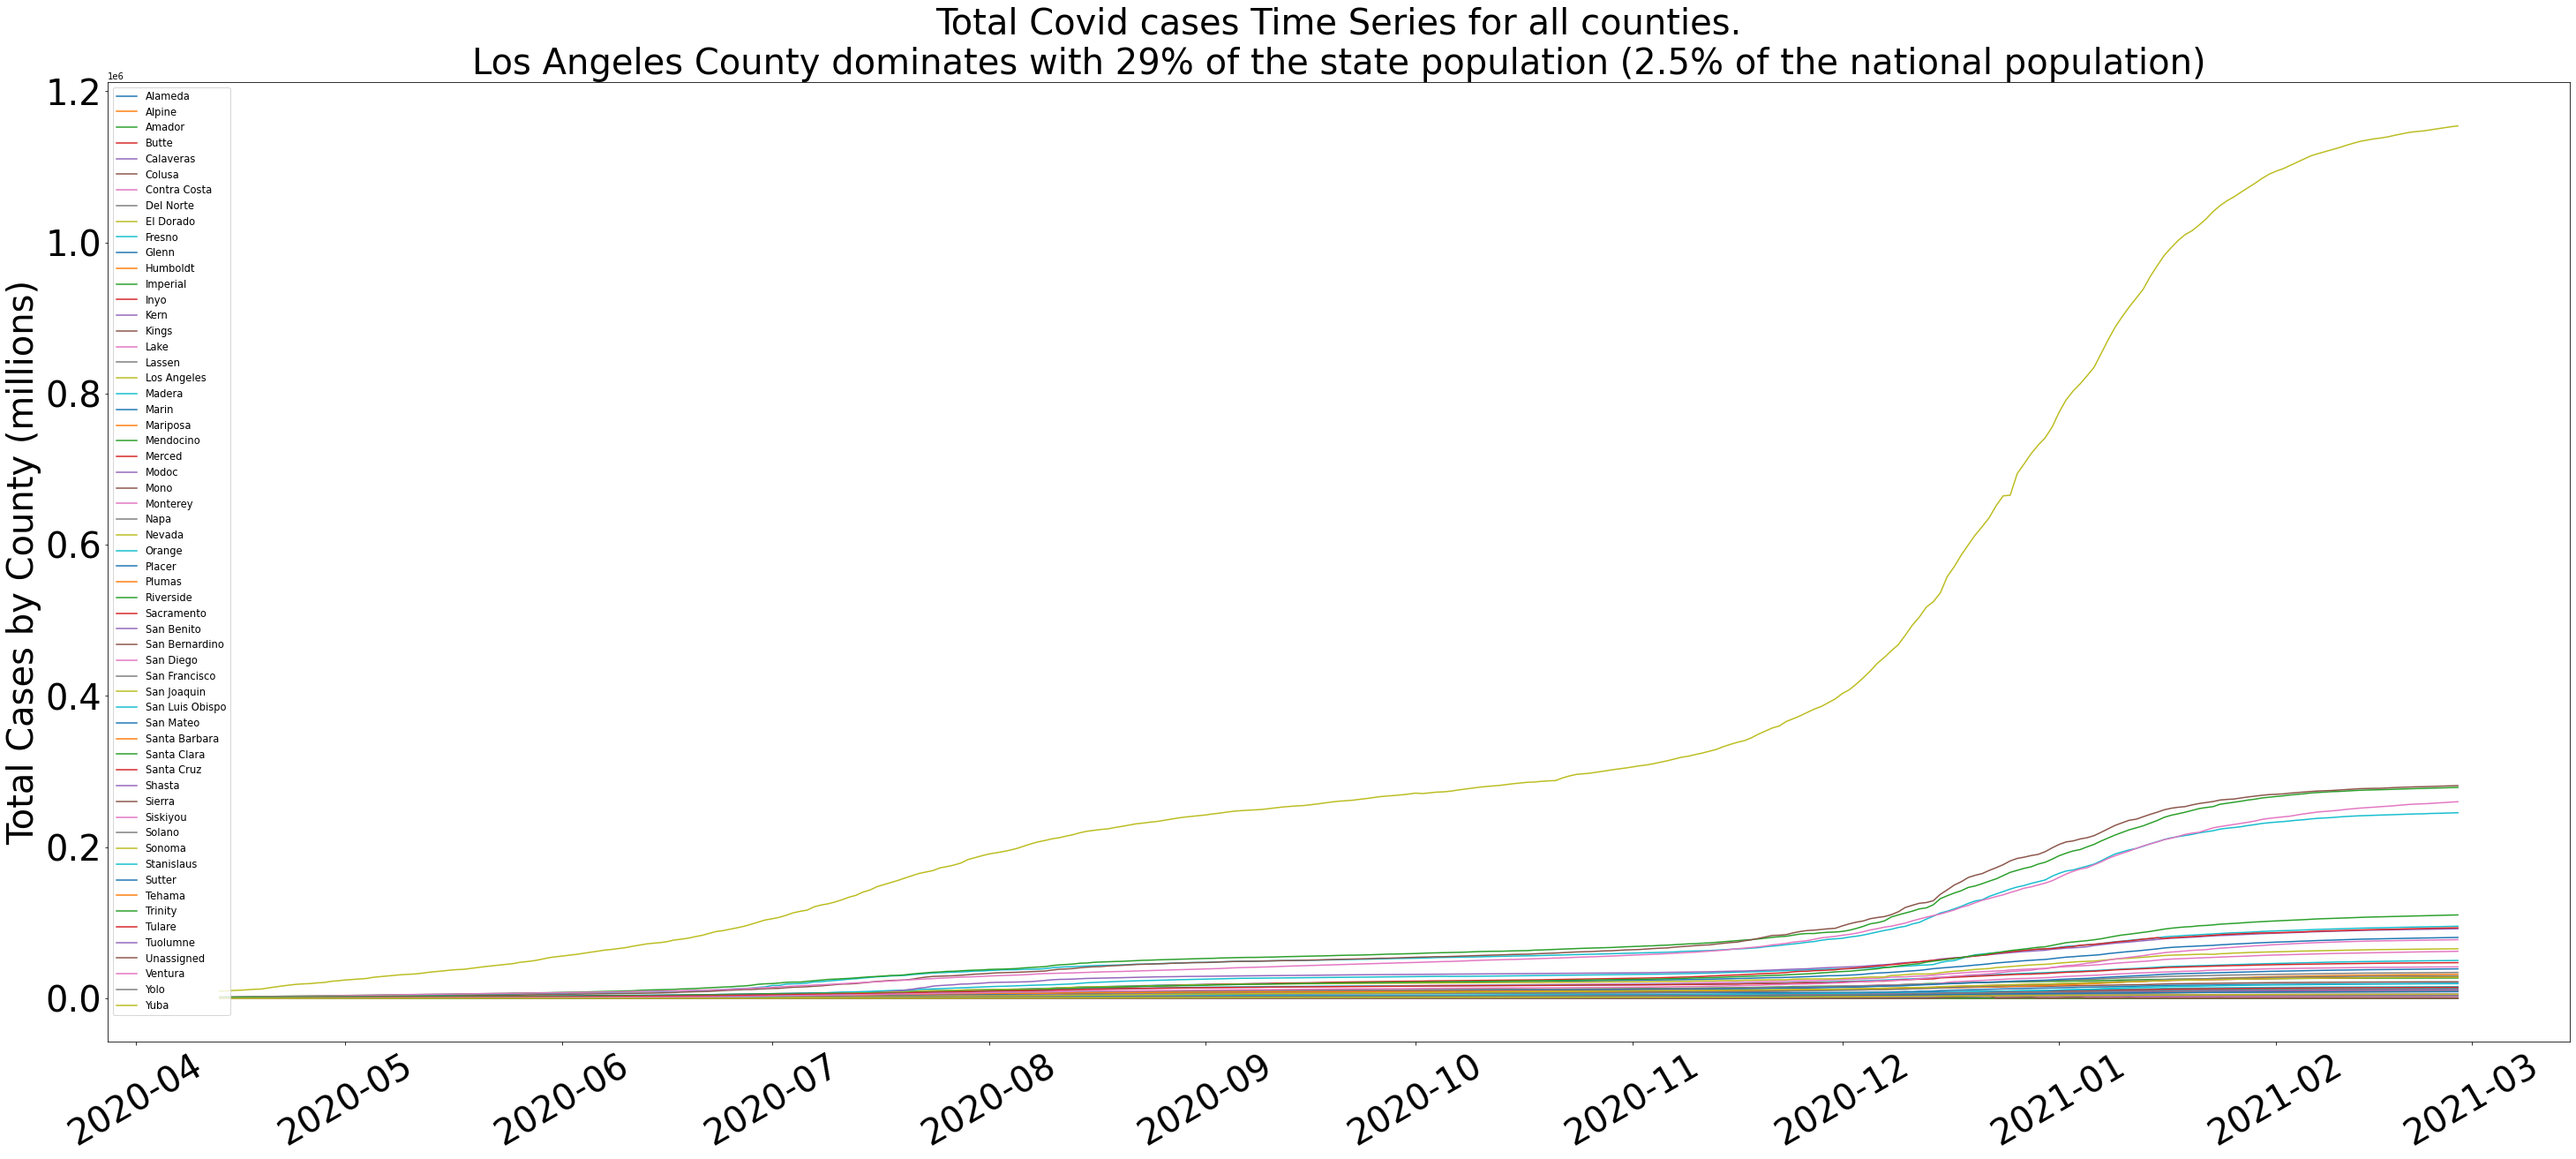

In [10]:
##########################################################################################
#//*** Quick illustration of why compareing counties in California is difficult
##########################################################################################

plt.rcParams['figure.figsize'] = [50,20]
plt.rcParams.update({'figure.max_open_warning': 0})



display_size = 40
fig,ax = plt.subplots()
for group in bt_df[ bt_df["race"] == "Latino"] .groupby("county"):
    loop_df = group[1]
    
    #print(loop_df["county"].iloc[0],loop_df['cases'])
   
    ax.plot(loop_df['date'],loop_df['cty_confirmed'], label=loop_df["county"].iloc[0])


        
plt.xticks(rotation=30,fontsize=display_size)
plt.yticks(fontsize=display_size)

handles,labels = deduplicate_legend(ax)
plt.legend(fontsize=display_size*.288,loc='upper left')
plt.title(f"Total Covid cases Time Series for all counties.\nLos Angeles County dominates with 29% of the state population (2.5% of the national population)",fontsize=display_size)
plt.ylabel("Total Cases by County (millions)",fontsize=display_size)
plt.show()


    
    
    

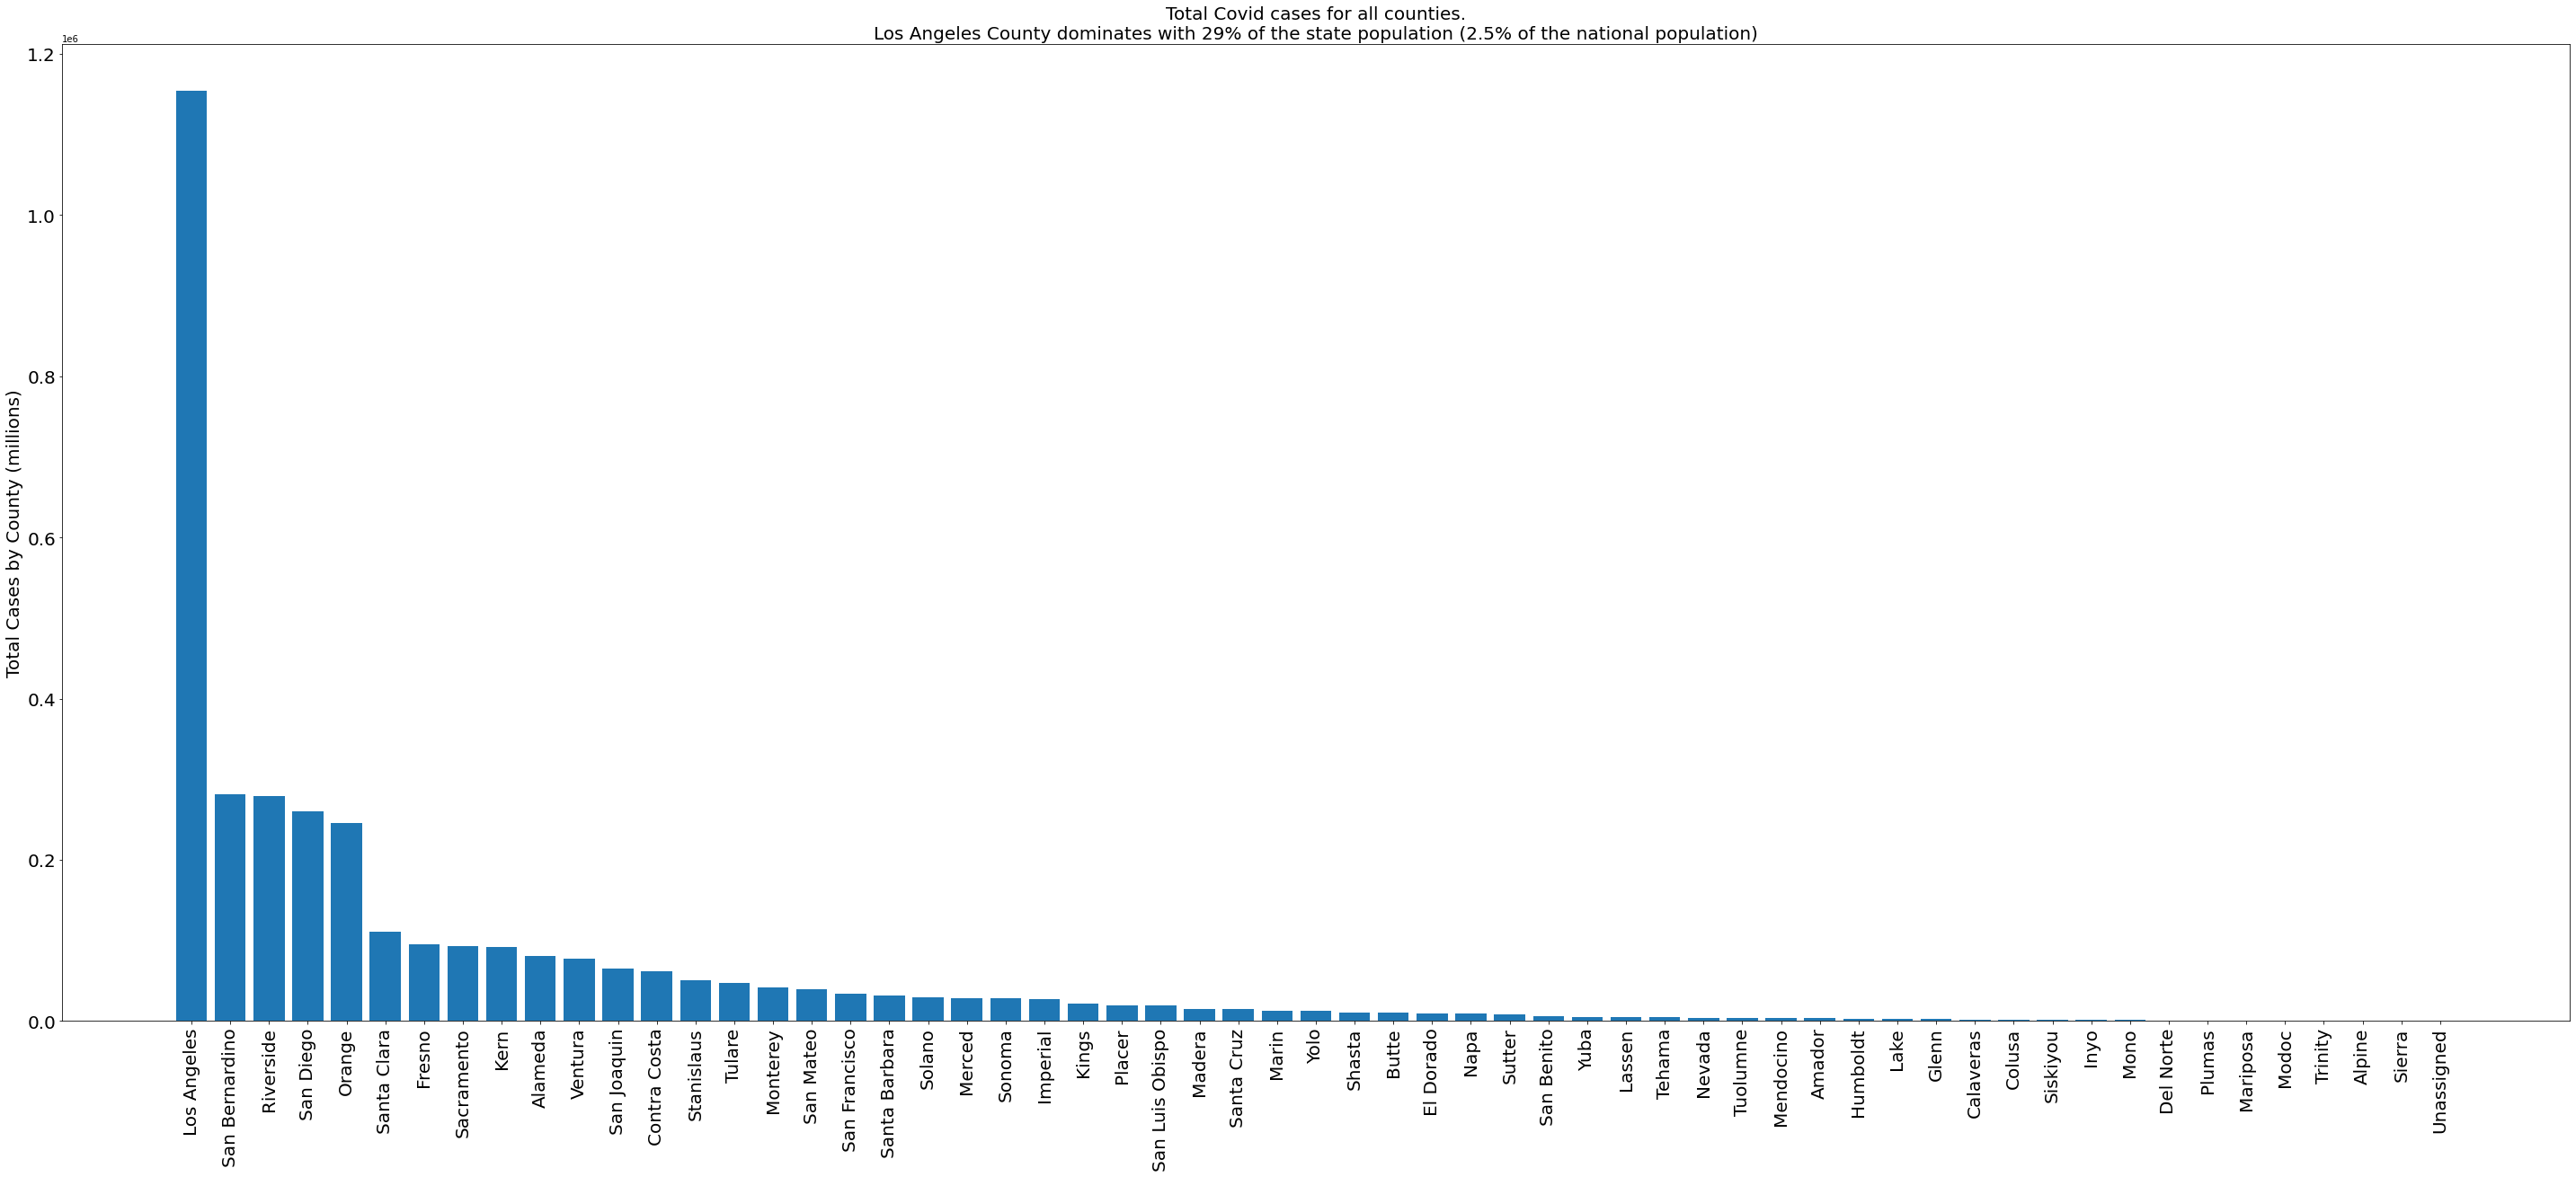

In [11]:
#//*** Snapshot the last day with raw numbers
#//*** Compare raw county values on the last day of the data set

#//*** Get the last data
last_date = (bt_df['date'].unique())[-1]


last_day_df = bt_df[  bt_df['race'] == "Latino"]

last_day_df =  last_day_df[last_day_df['date'] == last_date ].sort_values("cty_confirmed",ascending=False)

display_size = 20
fig,ax = plt.subplots()

ax.bar(last_day_df['county'],last_day_df['cty_confirmed'])


        
plt.xticks(rotation=90,fontsize=display_size)
plt.yticks(fontsize=display_size)

#handles,labels = deduplicate_legend(ax)
#plt.legend(fontsize=display_size*.58,loc='upper left')
plt.title(f"Total Covid cases for all counties.\nLos Angeles County dominates with 29% of the state population (2.5% of the national population)",fontsize=display_size)
plt.ylabel("Total Cases by County (millions)",fontsize=display_size)
plt.show()


#last_day_df = rd[race_list[0]][rd[race_list[0]]['date'] == last_date]

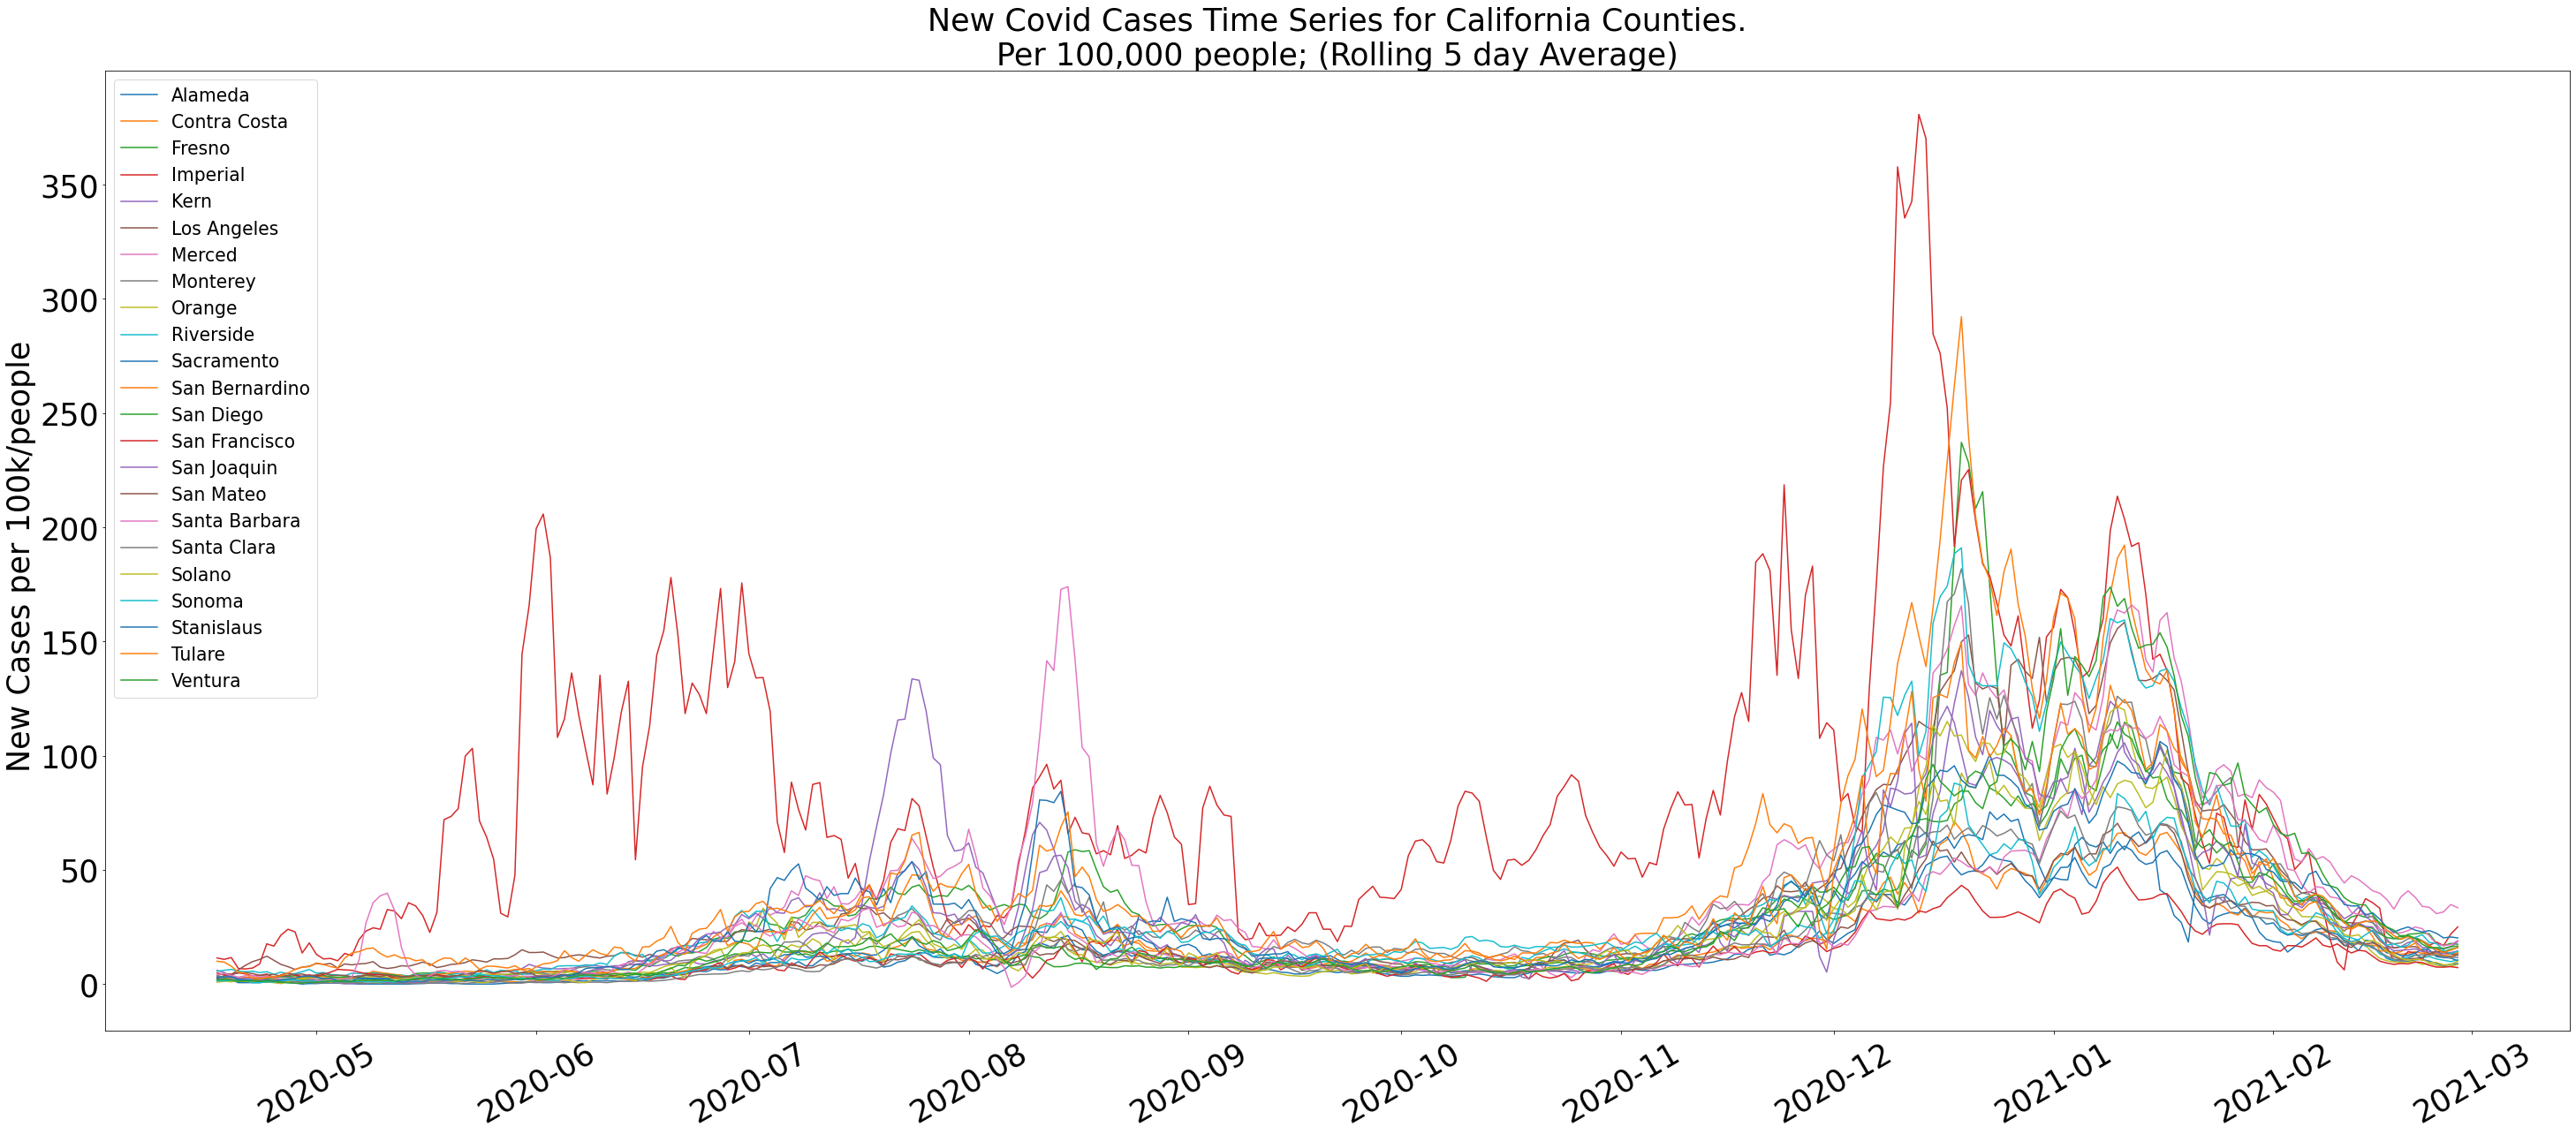

In [12]:

################################################################################################
#//*** Display a Time Series but scaled in cases per 100k
#//*** Rates per 100k scales conveys the relative prevalence of infection within the community
#//*** Some counties have a much higher COVID rate than others.
#//*** Note: This chart is NOT dominated by Los Angeles
################################################################################################

plt.rcParams['figure.figsize'] = [50,20]
plt.rcParams.update({'figure.max_open_warning': 0})

#//*** New Big Table contains cases per 100k
temp_df = nbt_df[ nbt_df["race"] == "Latino" ]

display_size = 35
fig,ax = plt.subplots()
#//*** Loop through each county and display the confirmed cases per 100k.
for group in temp_df.groupby("county"):
    loop_df = group[1]
    
    ax.plot(loop_df['date'],loop_df['confirm_cty_100k'].rolling(5).mean(), label=loop_df["county"].iloc[0])
        
plt.xticks(rotation=30,fontsize=display_size)
plt.yticks(fontsize=display_size)

handles,labels = deduplicate_legend(ax)
plt.legend(fontsize=display_size*.58,loc='upper left')
plt.title(f"New Covid Cases Time Series for California Counties.\nPer 100,000 people; (Rolling 5 day Average)",fontsize=display_size)
plt.ylabel("New Cases per 100k/people ",fontsize=display_size)
plt.show()
    
    
    

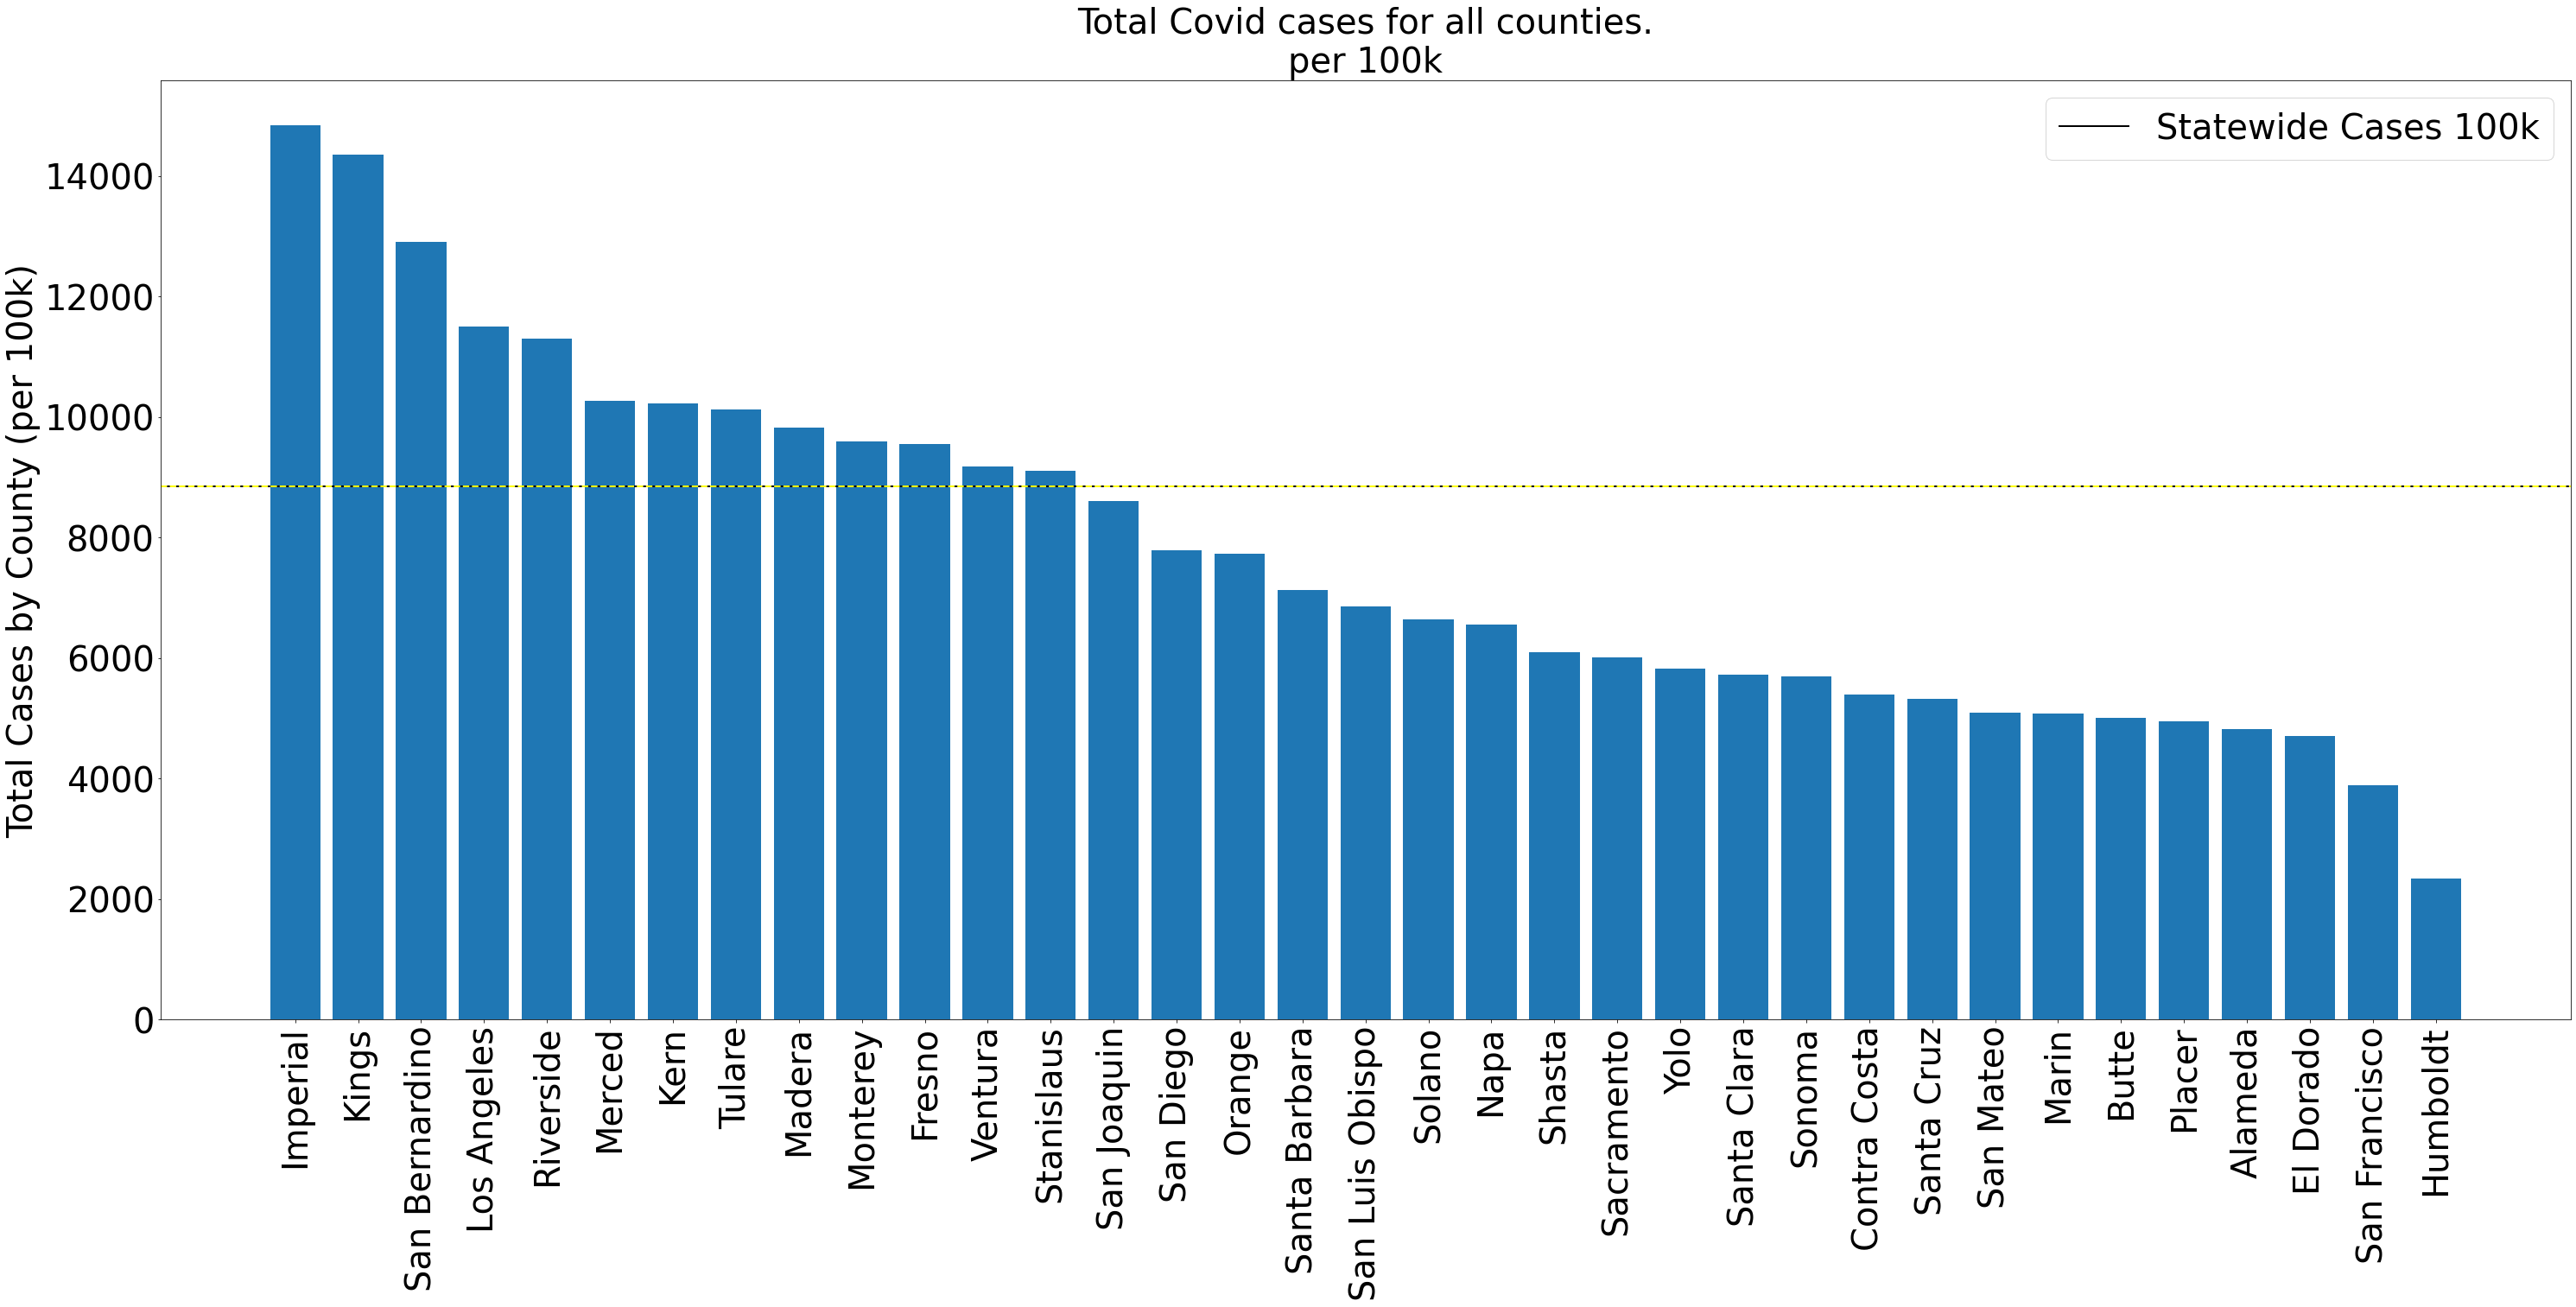

In [13]:
#//*** Look at total County COVID numbers by county rates per 100k.


#//*** Get the last data
last_date = (bt_df['date'].unique())[-1]


#//*** get Last Day from the Big Table
last_day_df = bt_df[  bt_df['race'] == "Latino" ]

#//*** Get counties with greater than 100k population
last_day_df = last_day_df[ last_day_df['pop'] > 100000]


#last_day_df['pop_100k']

#//*** Get just the lat day
last_day_df = last_day_df[last_day_df['date'] == last_date ]

last_day_df['100k_cases'] = last_day_df['cty_confirmed']/(last_day_df['pop'] / 100000)

#//*** Calculate the State per 100k rate for Comparison
state_100k = last_day_df['cty_confirmed'].sum()/(last_day_df['pop'].sum()/100000 )

last_day_df = last_day_df.sort_values('100k_cases',ascending=False)

display_size = 40
fig,ax = plt.subplots()

ax.bar(last_day_df['county'],last_day_df['100k_cases'])

ax.axhline(state_100k,color = "black", label="Statewide Cases 100k", linestyle = "-", lw=2)
ax.axhline(state_100k,color = "yellow", linestyle = "--", lw=2)
        
plt.xticks(rotation=90,fontsize=display_size)
plt.yticks(fontsize=display_size)

#handles,labels = deduplicate_legend(ax)
plt.legend(fontsize=display_size,loc='upper right')
plt.title(f"Total Covid cases for all counties.\nper 100k",fontsize=display_size)
plt.ylabel("Total Cases by County (per 100k)",fontsize=display_size)
plt.show()

#last_day_df = rd[race_list[0]][rd[race_list[0]]['date'] == last_date]

In [14]:
#//*** Get a list of counties above the State Rate per 100k
high_covid_counties = list(last_day_df[last_day_df['100k_cases'] > state_100k]['county'])

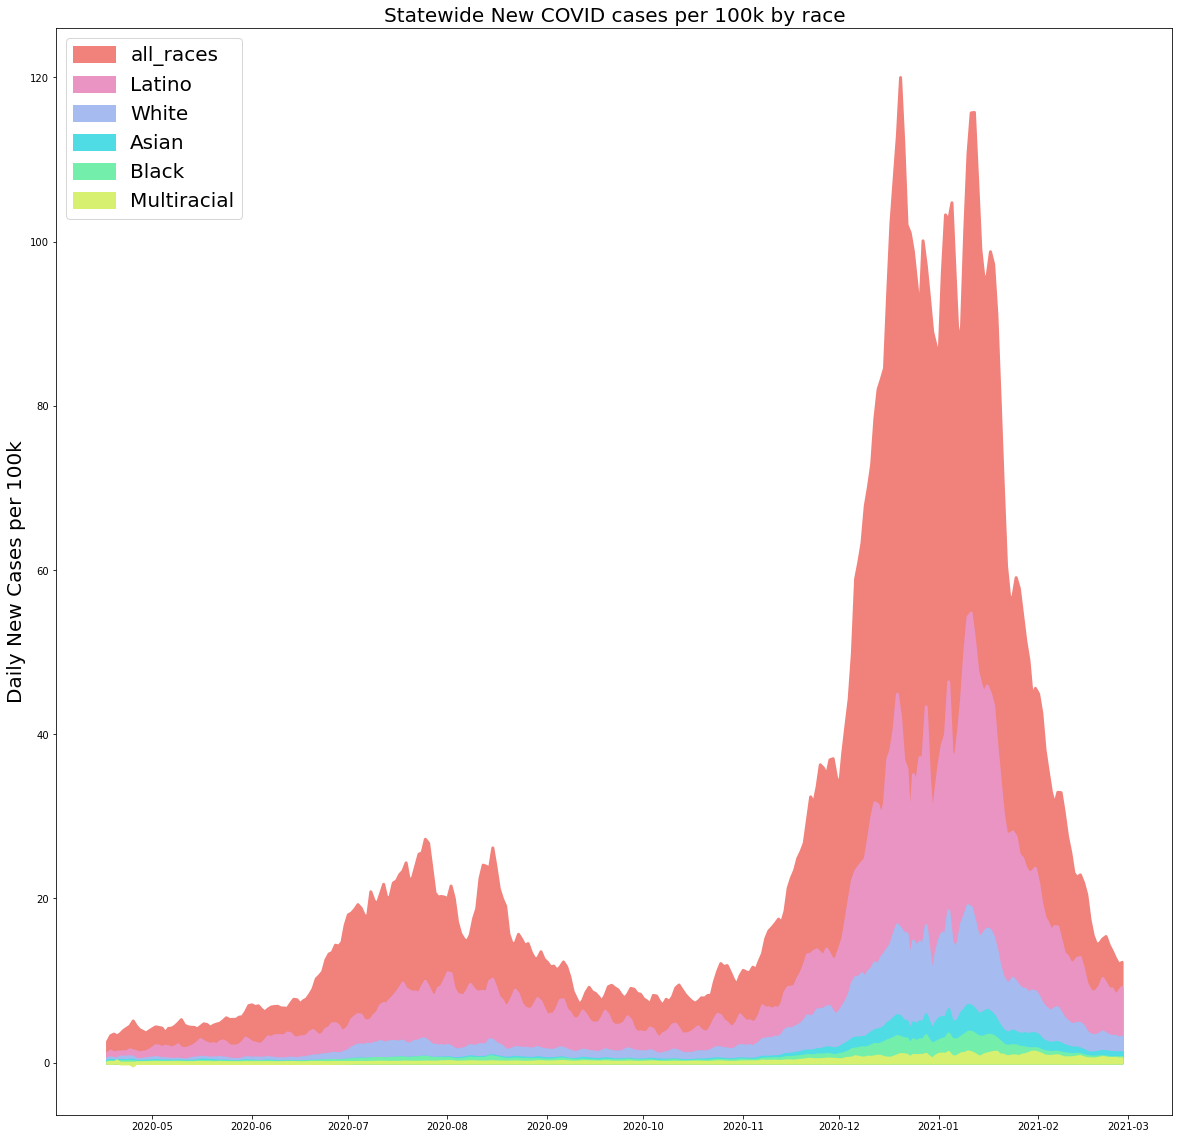

In [15]:
#//*** Plot Statewide New Case totals per 100k population
#//*** per 100k, gets everything on the same scale.
race_palette = ["#8651b8","#a84f72","#6b7744","#cb6d41","#73a6c0","#99ce65"]
race_palette = ["#F0817B","#E994C2","#A6BBF0","#4FDCE5","#74EEAB","#D8F06F"]


#//***Race Color Dict. Dictionary Key = County, Value = Color. Keeps the same colors for race across all graphs
rcd = {}
print()
scale_size = 20
plt.rcParams['figure.figsize'] = [scale_size, scale_size] 
plt.rcParams.update({'figure.max_open_warning': 0})

fig,ax = plt.subplots()
#//*** Generate the expected values per race. Which is the Total number * race population percentage

for col in state_race_df.sum().sort_values(ascending=False).index:
    #//*** Assign county color, so it is consistent across the graphs
    rcd = assign_color(col,rcd,race_palette)

    ax.fill_between(state_race_df['date'],state_race_df[col].rolling(5).mean(),color=rcd[col], label=col, linewidth=3)
    
plt.title("Statewide New COVID cases per 100k by race",fontsize=scale_size)
plt.legend(fontsize=scale_size,loc='upper left')
plt.ylabel('Daily New Cases per 100k',fontsize=scale_size)

plt.show()
    

In [16]:
pop_attrib_df = pop_attrib_df.rename(columns={"American Indian or Alaska Native" : "Native"})

races = ["Latino","White","Asian","Black","Multiracial","Hawaiian","Native"]

ca_pop = pop_attrib_df['population'].sum()
ca_covid_confirm = last_day_df['cty_confirmed'].sum()
print(ca_pop)
print(ca_covid_confirm)

race_pop = {}
race_percent = {}

for race in races:
    race_pop[race] = pop_attrib_df[race].sum()
    race_percent[race] = pop_attrib_df[race].sum()/ca_pop
print(race_pop)
print(race_percent)

race_cases = {}

for group in bt_df[ bt_df['date'] == bt_df['date'].unique()[-1] ].groupby('race'):
    race_cases[group[0]] = group[1].iloc[0]['cases']


print(race_cases)

race_expected = {}

for race in races:
    print(race,race_percent[race],ca_covid_confirm,int(race_percent[race]*ca_covid_confirm),race_cases[race],race_cases[race]/ca_covid_confirm)
    

39512223
3415179.0
{'Latino': 15574880, 'White': 14423748, 'Asian': 5869038, 'Black': 2221363, 'Multiracial': 1114409, 'Hawaiian': 146449, 'Native': 162336}
{'Latino': 0.3941787836133644, 'White': 0.36504521651439353, 'Asian': 0.1485372766801807, 'Black': 0.05621964119811735, 'Multiracial': 0.028204158495461013, 'Hawaiian': 0.0037064226935548525, 'Native': 0.004108500804928136}
{'Asian': 183711, 'Black': 109591, 'Hawaiian': 15175, 'Latino': 1487225, 'Multiracial': 41370, 'Native': 8861, 'White': 539466}
Latino 0.3941787836133644 3415179.0 1346191 1487225 0.43547497803189816
White 0.36504521651439353 3415179.0 1246694 539466 0.1579612664519195
Asian 0.1485372766801807 3415179.0 507281 183711 0.05379249521035354
Black 0.05621964119811735 3415179.0 192000 109591 0.03208938682276976
Multiracial 0.028204158495461013 3415179.0 96322 41370 0.012113567107317069
Hawaiian 0.0037064226935548525 3415179.0 12658 15175 0.004443398135207555
Native 0.004108500804928136 3415179.0 14031 8861 0.002594593

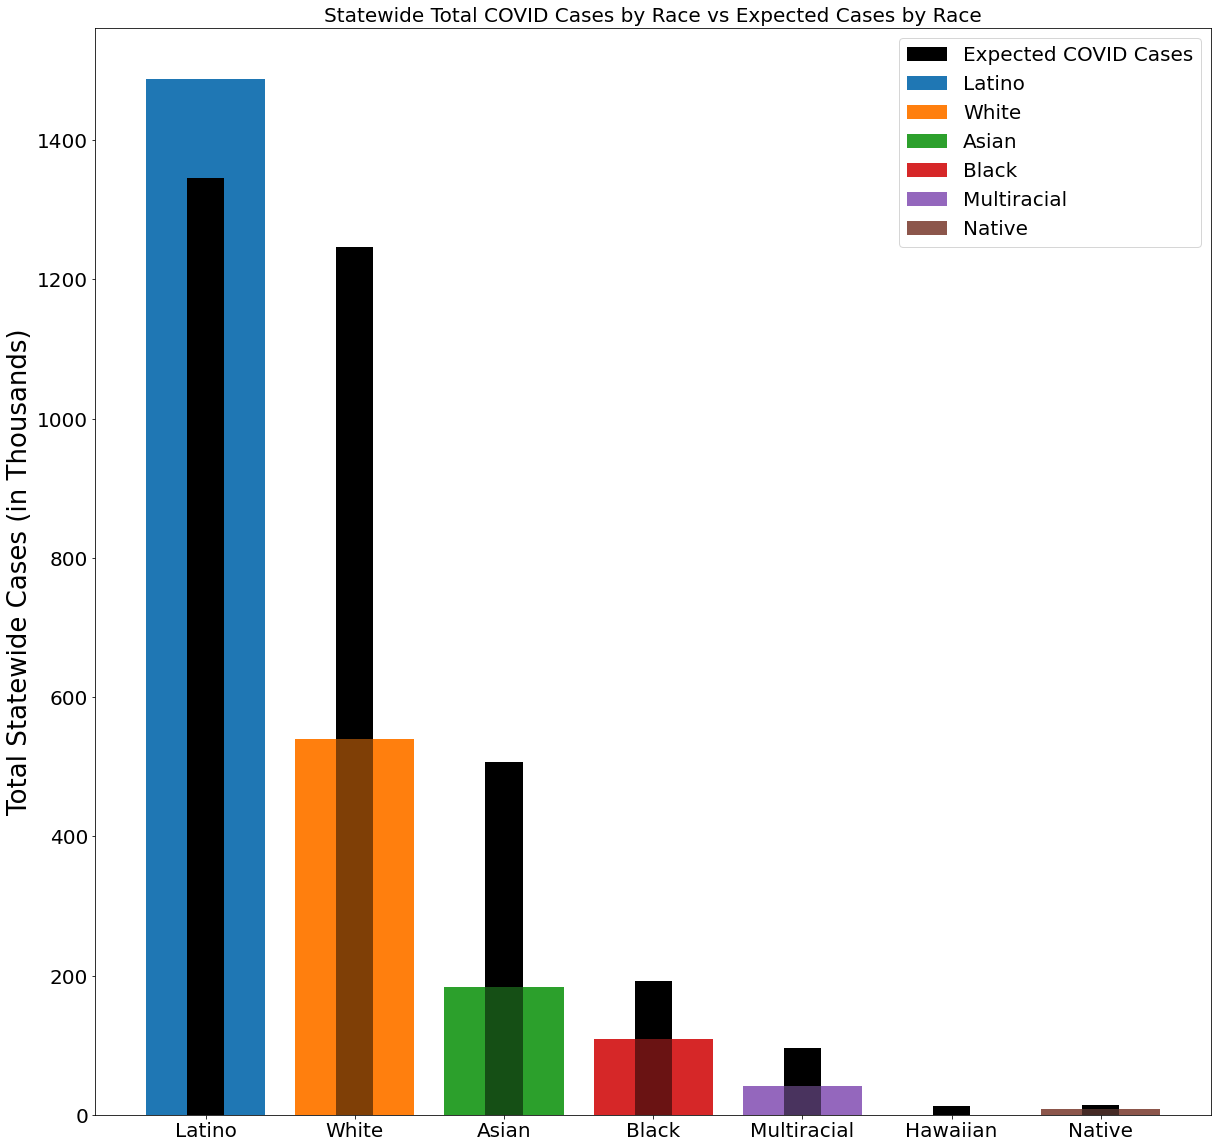

In [17]:
display_size = 20
fig,ax = plt.subplots()

index = np.arange(len(races))

for race in races:
    #print(race,race_percent[race],ca_covid_confirm,int(race_percent[race]*ca_covid_confirm),race_cases[race],race_cases[race]/ca_covid_confirm)
    loop_expected = race_percent[race]*ca_covid_confirm/1000
    loop_actual = race_cases[race]/1000

    if loop_expected > loop_actual:
        ax.bar(race,loop_expected,color="black",width=.25)
        ax.bar(race,loop_actual, label = race)
        ax.bar(race,loop_expected,color="black",width=.25, alpha=.5)
    else:
        if race == "Latino":
            
            ax.bar(race,loop_expected,color="black",width=.25,label = "Expected COVID Cases")    
            ax.bar(race,loop_actual, label = race)
            ax.bar(race,loop_expected,color="black",width=.25)    
        else:
            ax.bar(race,loop_expected,color="black",width=.25)
        
        
        #color=rcd[col]
plt.xticks(fontsize=display_size)
plt.yticks(fontsize=display_size)

handles,labels = deduplicate_legend(ax)
plt.legend(fontsize=display_size*1,loc='upper right')
plt.title(f"Statewide Total COVID Cases by Race vs Expected Cases by Race",fontsize=display_size)
plt.ylabel("Total Statewide Cases (in Thousands)",fontsize=display_size*1.3)
plt.show()

dict_keys(['county', 'Asian', 'Black', 'Hawaiian', 'Latino', 'Multiracial', 'Native', 'White'])
      county   Asian   Black  Hawaiian   Latino  Multiracial  Native   White
0       83.0    1902    1030       243     5276          268      33    4639
1       86.0    2045    1107       252     5910          303      33    4939
2      115.0    2161    1176       262     6433          329      32    5239
3      132.0    2361    1244       279     7013          362      34    5504
4      135.0    2489    1312       290     7627          376      38    5757
..       ...     ...     ...       ...      ...          ...     ...     ...
316  26816.0  181664  108479     15066  1472040        40426    8740  534330
317  26843.0  182235  108739     15097  1476643        40752    8770  535706
318  26855.0  182779  109065     15126  1479012        41093    8813  537448
319  26888.0  183305  109352     15156  1484054        41164    8835  538323
320  26903.0  183711  109591     15175  1487225        41

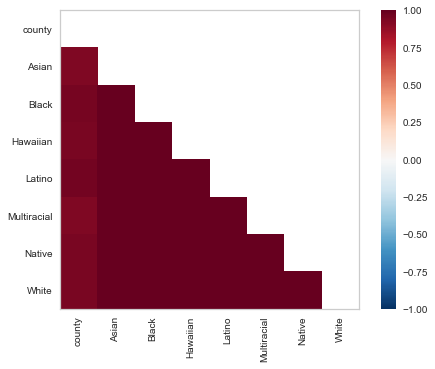

dict_keys(['county', 'Asian', 'Black', 'Hawaiian', 'Latino', 'Multiracial', 'Native', 'White'])
      county   Asian   Black  Hawaiian   Latino  Multiracial  Native   White
0       10.0    1902    1030       243     5276          268      33    4639
1       12.0    2045    1107       252     5910          303      33    4939
2       12.0    2161    1176       262     6433          329      32    5239
3       12.0    2361    1244       279     7013          362      34    5504
4       15.0    2489    1312       290     7627          376      38    5757
..       ...     ...     ...       ...      ...          ...     ...     ...
316  21839.0  181664  108479     15066  1472040        40426    8740  534330
317  21871.0  182235  108739     15097  1476643        40752    8770  535706
318  21900.0  182779  109065     15126  1479012        41093    8813  537448
319  21917.0  183305  109352     15156  1484054        41164    8835  538323
320  21955.0  183711  109591     15175  1487225        41

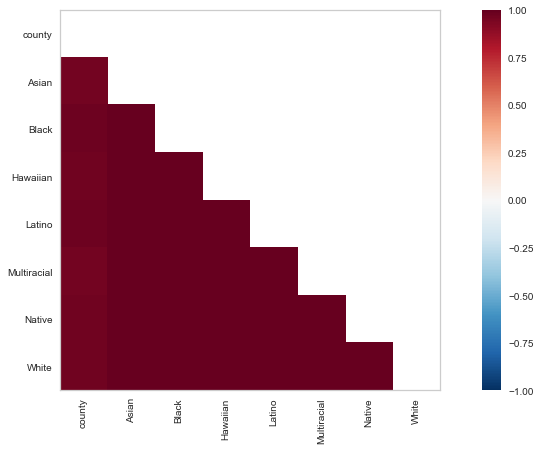

dict_keys(['county', 'Asian', 'Black', 'Hawaiian', 'Latino', 'Multiracial', 'Native', 'White'])
       county   Asian   Black  Hawaiian   Latino  Multiracial  Native   White
0       925.0    1902    1030       243     5276          268      33    4639
1       933.0    2045    1107       252     5910          303      33    4939
2      1063.0    2161    1176       262     6433          329      32    5239
3      1143.0    2361    1244       279     7013          362      34    5504
4      1229.0    2489    1312       290     7627          376      38    5757
..        ...     ...     ...       ...      ...          ...     ...     ...
316  280279.0  181664  108479     15066  1472040        40426    8740  534330
317  280583.0  182235  108739     15097  1476643        40752    8770  535706
318  280946.0  182779  109065     15126  1479012        41093    8813  537448
319  281132.0  183305  109352     15156  1484054        41164    8835  538323
320  281471.0  183711  109591     15175  14872

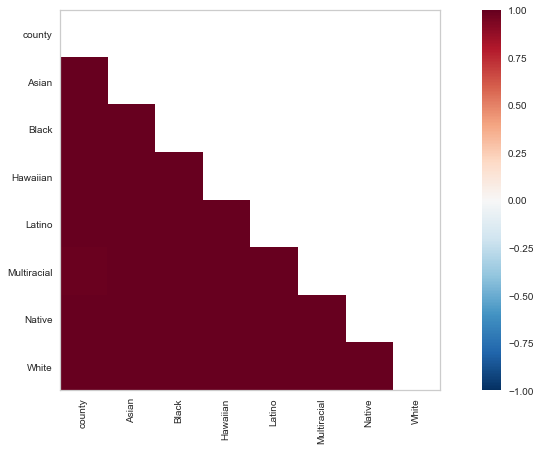

dict_keys(['county', 'Asian', 'Black', 'Hawaiian', 'Latino', 'Multiracial', 'Native', 'White'])
        county   Asian   Black  Hawaiian   Latino  Multiracial  Native   White
0       9367.0    1902    1030       243     5276          268      33    4639
1       9948.0    2045    1107       252     5910          303      33    4939
2      10416.0    2161    1176       262     6433          329      32    5239
3      10786.0    2361    1244       279     7013          362      34    5504
4      11354.0    2489    1312       290     7627          376      38    5757
..         ...     ...     ...       ...      ...          ...     ...     ...
316  1148965.0  181664  108479     15066  1472040        40426    8740  534330
317  1150322.0  182235  108739     15097  1476643        40752    8770  535706
318  1151846.0  182779  109065     15126  1479012        41093    8813  537448
319  1153131.0  183305  109352     15156  1484054        41164    8835  538323
320  1154275.0  183711  109591     

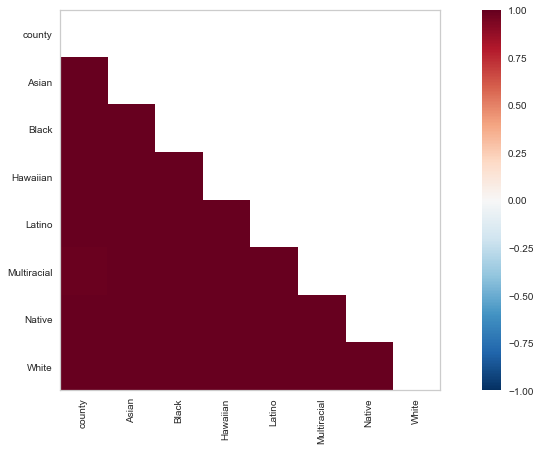

dict_keys(['county', 'Asian', 'Black', 'Hawaiian', 'Latino', 'Multiracial', 'Native', 'White'])
       county   Asian   Black  Hawaiian   Latino  Multiracial  Native   White
0      1460.0    1902    1030       243     5276          268      33    4639
1      1467.0    2045    1107       252     5910          303      33    4939
2      1723.0    2161    1176       262     6433          329      32    5239
3      1913.0    2361    1244       279     7013          362      34    5504
4      2080.0    2489    1312       290     7627          376      38    5757
..        ...     ...     ...       ...      ...          ...     ...     ...
316  278075.0  181664  108479     15066  1472040        40426    8740  534330
317  278293.0  182235  108739     15097  1476643        40752    8770  535706
318  278544.0  182779  109065     15126  1479012        41093    8813  537448
319  278772.0  183305  109352     15156  1484054        41164    8835  538323
320  279048.0  183711  109591     15175  14872

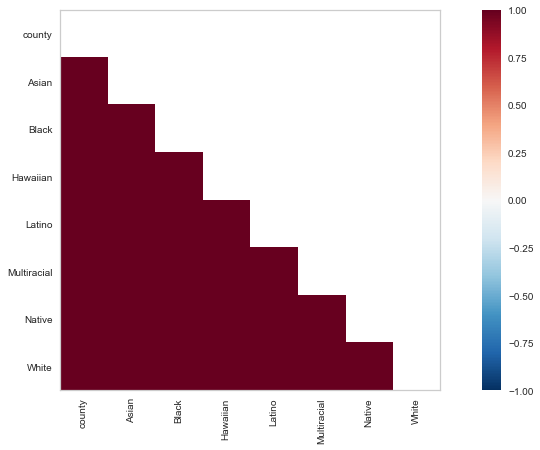

dict_keys(['county', 'Asian', 'Black', 'Hawaiian', 'Latino', 'Multiracial', 'Native', 'White'])
      county   Asian   Black  Hawaiian   Latino  Multiracial  Native   White
0       60.0    1902    1030       243     5276          268      33    4639
1       61.0    2045    1107       252     5910          303      33    4939
2       74.0    2161    1176       262     6433          329      32    5239
3       76.0    2361    1244       279     7013          362      34    5504
4       80.0    2489    1312       290     7627          376      38    5757
..       ...     ...     ...       ...      ...          ...     ...     ...
316  28209.0  181664  108479     15066  1472040        40426    8740  534330
317  28295.0  182235  108739     15097  1476643        40752    8770  535706
318  28383.0  182779  109065     15126  1479012        41093    8813  537448
319  28455.0  183305  109352     15156  1484054        41164    8835  538323
320  28501.0  183711  109591     15175  1487225        41

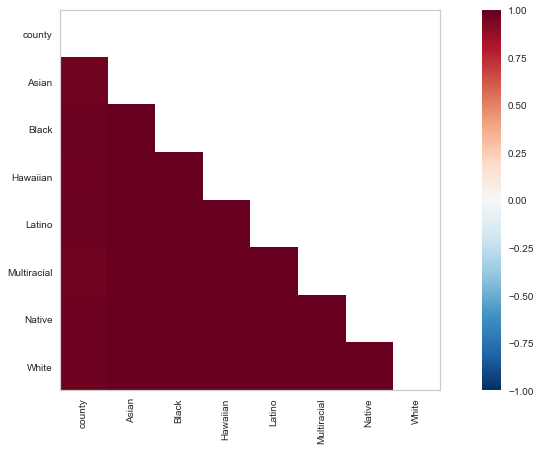

dict_keys(['county', 'Asian', 'Black', 'Hawaiian', 'Latino', 'Multiracial', 'Native', 'White'])
      county   Asian   Black  Hawaiian   Latino  Multiracial  Native   White
0      379.0    1902    1030       243     5276          268      33    4639
1      453.0    2045    1107       252     5910          303      33    4939
2      500.0    2161    1176       262     6433          329      32    5239
3      587.0    2361    1244       279     7013          362      34    5504
4      612.0    2489    1312       290     7627          376      38    5757
..       ...     ...     ...       ...      ...          ...     ...     ...
316  91390.0  181664  108479     15066  1472040        40426    8740  534330
317  91525.0  182235  108739     15097  1476643        40752    8770  535706
318  91735.0  182779  109065     15126  1479012        41093    8813  537448
319  91884.0  183305  109352     15156  1484054        41164    8835  538323
320  92053.0  183711  109591     15175  1487225        41

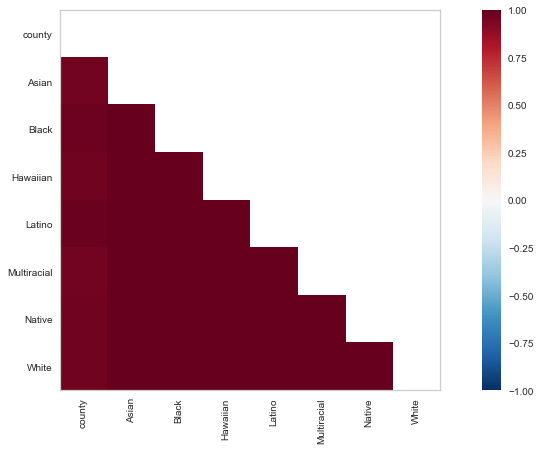

dict_keys(['county', 'Asian', 'Black', 'Hawaiian', 'Latino', 'Multiracial', 'Native', 'White'])
      county   Asian   Black  Hawaiian   Latino  Multiracial  Native   White
0      186.0    1902    1030       243     5276          268      33    4639
1      228.0    2045    1107       252     5910          303      33    4939
2      289.0    2161    1176       262     6433          329      32    5239
3      305.0    2361    1244       279     7013          362      34    5504
4      370.0    2489    1312       290     7627          376      38    5757
..       ...     ...     ...       ...      ...          ...     ...     ...
316  46937.0  181664  108479     15066  1472040        40426    8740  534330
317  46976.0  182235  108739     15097  1476643        40752    8770  535706
318  47052.0  182779  109065     15126  1479012        41093    8813  537448
319  47135.0  183305  109352     15156  1484054        41164    8835  538323
320  47209.0  183711  109591     15175  1487225        41

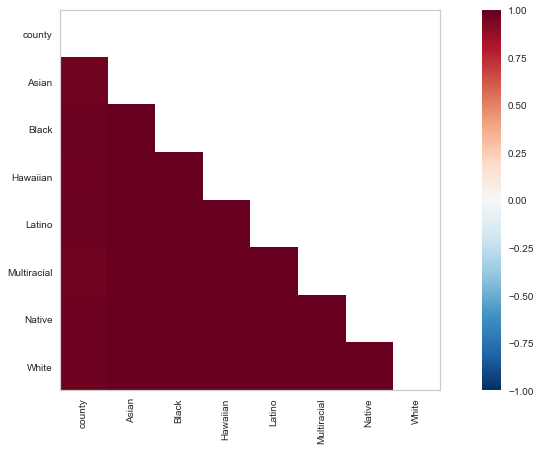

dict_keys(['county', 'Asian', 'Black', 'Hawaiian', 'Latino', 'Multiracial', 'Native', 'White'])
      county   Asian   Black  Hawaiian   Latino  Multiracial  Native   White
0       29.0    1902    1030       243     5276          268      33    4639
1       29.0    2045    1107       252     5910          303      33    4939
2       30.0    2161    1176       262     6433          329      32    5239
3       34.0    2361    1244       279     7013          362      34    5504
4       34.0    2489    1312       290     7627          376      38    5757
..       ...     ...     ...       ...      ...          ...     ...     ...
316  15352.0  181664  108479     15066  1472040        40426    8740  534330
317  15390.0  182235  108739     15097  1476643        40752    8770  535706
318  15414.0  182779  109065     15126  1479012        41093    8813  537448
319  15436.0  183305  109352     15156  1484054        41164    8835  538323
320  15467.0  183711  109591     15175  1487225        41

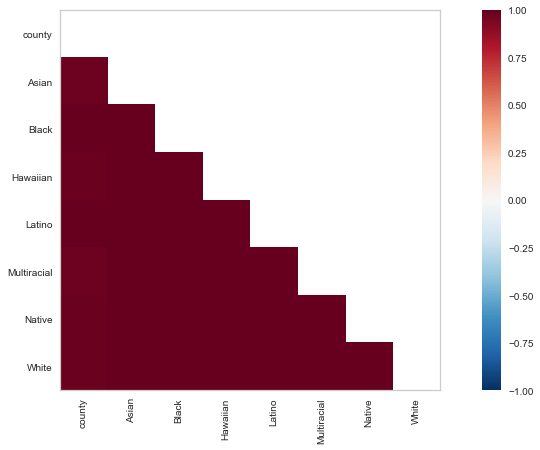

dict_keys(['county', 'Asian', 'Black', 'Hawaiian', 'Latino', 'Multiracial', 'Native', 'White'])
      county   Asian   Black  Hawaiian   Latino  Multiracial  Native   White
0       89.0    1902    1030       243     5276          268      33    4639
1       98.0    2045    1107       252     5910          303      33    4939
2      106.0    2161    1176       262     6433          329      32    5239
3      116.0    2361    1244       279     7013          362      34    5504
4      119.0    2489    1312       290     7627          376      38    5757
..       ...     ...     ...       ...      ...          ...     ...     ...
316  41439.0  181664  108479     15066  1472040        40426    8740  534330
317  41495.0  182235  108739     15097  1476643        40752    8770  535706
318  41564.0  182779  109065     15126  1479012        41093    8813  537448
319  41607.0  183305  109352     15156  1484054        41164    8835  538323
320  41665.0  183711  109591     15175  1487225        41

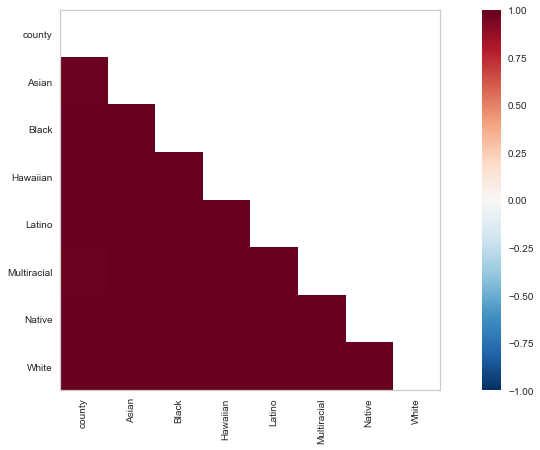

dict_keys(['county', 'Asian', 'Black', 'Hawaiian', 'Latino', 'Multiracial', 'Native', 'White'])
      county   Asian   Black  Hawaiian   Latino  Multiracial  Native   White
0      209.0    1902    1030       243     5276          268      33    4639
1      244.0    2045    1107       252     5910          303      33    4939
2      264.0    2161    1176       262     6433          329      32    5239
3      289.0    2361    1244       279     7013          362      34    5504
4      315.0    2489    1312       290     7627          376      38    5757
..       ...     ...     ...       ...      ...          ...     ...     ...
316  94741.0  181664  108479     15066  1472040        40426    8740  534330
317  94794.0  182235  108739     15097  1476643        40752    8770  535706
318  95015.0  182779  109065     15126  1479012        41093    8813  537448
319  95202.0  183305  109352     15156  1484054        41164    8835  538323
320  95393.0  183711  109591     15175  1487225        41

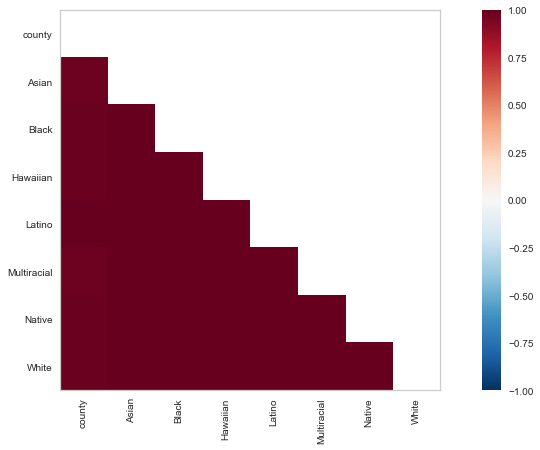

dict_keys(['county', 'Asian', 'Black', 'Hawaiian', 'Latino', 'Multiracial', 'Native', 'White'])
      county   Asian   Black  Hawaiian   Latino  Multiracial  Native   White
0      311.0    1902    1030       243     5276          268      33    4639
1      328.0    2045    1107       252     5910          303      33    4939
2      365.0    2161    1176       262     6433          329      32    5239
3      384.0    2361    1244       279     7013          362      34    5504
4      398.0    2489    1312       290     7627          376      38    5757
..       ...     ...     ...       ...      ...          ...     ...     ...
316  77093.0  181664  108479     15066  1472040        40426    8740  534330
317  77238.0  182235  108739     15097  1476643        40752    8770  535706
318  77395.0  182779  109065     15126  1479012        41093    8813  537448
319  77534.0  183305  109352     15156  1484054        41164    8835  538323
320  77623.0  183711  109591     15175  1487225        41

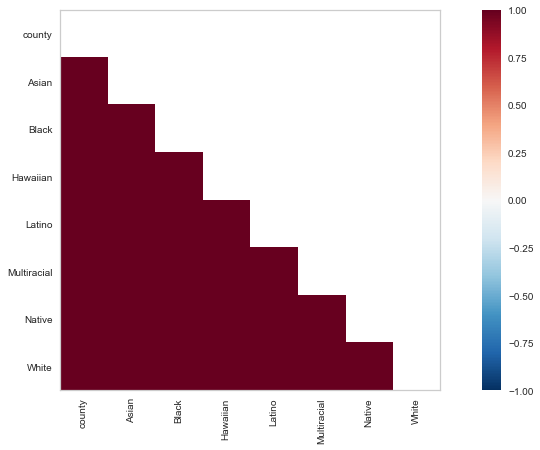

dict_keys(['county', 'Asian', 'Black', 'Hawaiian', 'Latino', 'Multiracial', 'Native', 'White'])
      county   Asian   Black  Hawaiian   Latino  Multiracial  Native   White
0      132.0    1902    1030       243     5276          268      33    4639
1      136.0    2045    1107       252     5910          303      33    4939
2      174.0    2161    1176       262     6433          329      32    5239
3      185.0    2361    1244       279     7013          362      34    5504
4      201.0    2489    1312       290     7627          376      38    5757
..       ...     ...     ...       ...      ...          ...     ...     ...
316  49749.0  181664  108479     15066  1472040        40426    8740  534330
317  49851.0  182235  108739     15097  1476643        40752    8770  535706
318  49964.0  182779  109065     15126  1479012        41093    8813  537448
319  50054.0  183305  109352     15156  1484054        41164    8835  538323
320  50147.0  183711  109591     15175  1487225        41

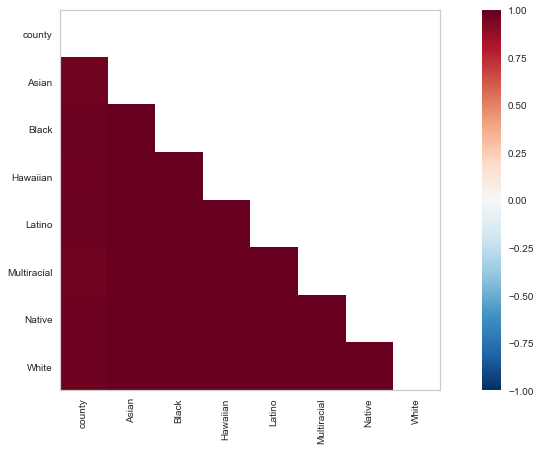

In [18]:
#//*** Get the last data
last_date = (bt_df['date'].unique())[-1]


#//*** get Last Day from the Big Table
 

#//*** Get just the last day *all Races*
last_fullday_df = bt_df[bt_df['date'] == last_date ]

#last_fullday_df['100k_cases'] = last_fullday_df['cty_confirmed']/(last_day_df['pop'] / 100000)

#high_covid_df = bt_df.apply(lambda x: bt_df[ bt_df['county']==county] for county in high_covid_counties)



for county in high_covid_counties:
    
    
    
    
    loop_dict = {}
    
    for group in bt_df[bt_df['county'] == county].groupby('race'):
        loop_dict['county'] = list(group[1]['cty_confirmed'])
        loop_dict[group[0]] = list(group[1]['cases'])
        
        
    print(loop_dict.keys())
    
    loop_corr_df = pd.DataFrame()
    
    for key,value in loop_dict.items():
        loop_corr_df[key] = loop_dict[key]
        
    print(loop_corr_df)
    
    plt.rcParams['figure.figsize'] = (15, 7)

    # import the package for visulization of the correlation
    from yellowbrick.features import Rank2D

    num_features = loop_dict.keys()
    num_features = ['county', 'Asian', 'Black', 'Hawaiian', 'Latino', 'Multiracial', 'Native', 'White']
    print(num_features)
    # extract the numpy arrays from the data frame
    X = loop_corr_df[num_features].values

    # instantiate the visualizer with the Covariance ranking algorithm
    visualizer = Rank2D(features=num_features, algorithm='pearson')
    visualizer.fit(X)                # Fit the data to the visualizer
    visualizer.transform(X)             # Transform the data
    plt.show()

